#### Import all the required packages

In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install datetime
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install -U kaleido
!pip3 install bokeh
!pip3 install plotly

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-co

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import xlsxwriter as xlsx
import random
import math 
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
from collections import OrderedDict
import matplotlib.pyplot as plt
import string
import re
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly import tools
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import show, output_notebook
from bokeh.layouts import row 
from bokeh.plotting import figure
from bokeh.resources import INLINE
import bokeh.io
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.transform import transform
from bokeh import *
from mpl_toolkits.mplot3d import Axes3D

bokeh.io.output_notebook(INLINE)
init_notebook_mode(connected =True)
%matplotlib inline


Loading BokehJS ...

## Question 1

In [3]:
birthdaydict = {"Lionel Messi": {'birthday': '24/06/1987'}, 
                "Cristiano Ronaldo": {'birthday': '05/02/1985'},
               "Zenedine Zidane": {'birthday': '23/06/1972'},
               "Mohamed Salah": {'birthday': '15/06/1992'},
               "Sergio Ramos": {'birthday': '30/03/1986'},
               "Kun Aguero": {'birthday': '02/06/1988'},
               "Manuel Neuer": {'birthday': '27/03/1986'},
               "Luka Modric": {'birthday': '11/09/1985'},
               "Frankie de Jong": {'birthday': '12/05/1997'},
               "Robinho": {'birthday': '25/01/1984'},
               "Erling Haaland": {'birthday': '21/07/2000'},
               "Virgil van Dijk": {'birthday': '08/07/1991'},
               "Giorgos Karagounis": {'birthday': '06/03/1977'},
               "Angelos Basinas": {'birthday': '03/01/1976'},
               "Michael Ballack": {'birthday': '26/09/1976'},
               "Franz Beckenbauer": {'birthday': '11/09/1945'},
               "Oliver Kahn": {'birthday': '15/06/1969'},
               "Pele": {'birthday': '23/10/1940'},
               "Ruud Gullit": {'birthday': '01/09/1962'},
               "Kylian Mbappe": {'birthday': '20/12/1998'},
               "Roberto Baggio": {'birthday': '18/02/1967'},
               "Eusebio": {'birthday': '25/01/1942'},
               "Paolo Maldini": {'birthday': '26/06/1968'},
               "Ferenc Puskas": {'birthday': '01/04/1927'},
               "Ronaldhino": {'birthday': '21/03/1980'},
               "Ronaldo": {'birthday': '18/09/1976'},
               "Diego Maradona": {'birthday': '30/10/1960'},
               "Robert Lewandowski": {'birthday': '21/08/1988'},
               "Kaka": {'birthday': '22/04/1982'},
               "Luis Figo": {'birthday': '04/11/1972'},
               "Xavi": {'birthday': '25/01/1980'},
               "Thomas Muller": {'birthday': '13/09/1989'},
               "Neymar": {'birthday': '05/02/1992'},
               "Johan Cruijff": {'birthday': '25/04/1947'},
               "Zlatan Ibrahimovic": {'birthday': '03/10/1981'},
               }

## Question 2

In [4]:
# First extract the birthdays (values) for each element in the dictionary.
bdays = list(birthdaydict.values())
birthdays = []

"""
Because birthdays are a dict within a dict, we must create a list of dates 
without the key called 'birthday'.
"""
for i in bdays:
    birthdays.append(*i.values())

In [5]:
# Initialise an empty dictionary to count number of birthdays in a month and loop through birthdays
counter = {} 
for date in birthdays:
    # Only keep the month and convert numeric to long name.
    month = datetime.strptime(date, "%d/%m/%Y").strftime("%B") 
    if month in counter:
        counter[month] += 1 
    else:
        counter[month] = 1

# For easy interpretation, order dict in month order.
counter = OrderedDict(
    sorted(counter.items(), key = lambda x:datetime.strptime(x[0], '%B')) )

# Print final output.
print("Number of birthdays per month: ")
for keys, values in counter.items():
    print('{}: {}'.format(keys,values))

Number of birthdays per month: 
January: 4
February: 3
March: 4
April: 3
May: 1
June: 6
July: 2
August: 1
September: 6
October: 3
November: 1
December: 1


In [6]:
# Create a dataframe from the dictionary of names and birthdays
birthdays_df = pd.DataFrame(list(birthdaydict.items()), columns=['Name', 'Birthday'])
# Because birthdays are a dict within dict, we need to extract dates only
birthdays_df['Birthday'] = birthdays_df['Birthday'].apply(pd.Series)

In [7]:
# Check to see what it looks like
birthdays_df.head()

Name    Birthday
0       Lionel Messi  24/06/1987
1  Cristiano Ronaldo  05/02/1985
2    Zenedine Zidane  23/06/1972
3      Mohamed Salah  15/06/1992
4       Sergio Ramos  30/03/1986

In [8]:
month = [] # Initialise an empty list, that will be populated with long format month names
for row in birthdays_df['Birthday']:
    month.append(datetime.strptime(row, "%d/%m/%Y").strftime("%B") ) # Populate with month names

In [9]:
birthdays_df['Month'] = month # Create a new column titled Month with the populated list 

In [10]:
# Check if everything looks good
birthdays_df.head()

Name    Birthday     Month
0       Lionel Messi  24/06/1987      June
1  Cristiano Ronaldo  05/02/1985  February
2    Zenedine Zidane  23/06/1972      June
3      Mohamed Salah  15/06/1992      June
4       Sergio Ramos  30/03/1986     March

In [11]:
# Save to an excel file if everything looks good!

#destination = input("Please provide destination path: ")
#writer = pd.ExcelWriter(destination, engine='xlsxwriter') # Initialise excel writer

writer = pd.ExcelWriter('/Users/ravinschmidl/Desktop/FDM/Python/footballer_birthdays.xlsx', engine='xlsxwriter') # Initialise excel writer
birthdays_df.to_excel(writer, sheet_name='Footballer_Birthdays') # Convert df to XlsxWriter Excel object
writer.save() # Close Pandas Excel Writer and save df as Excel file


## Question 3

In [12]:
values = [] # Count of birthdays per month (preserve order of keys)
keys = [] # Months (preserved order)
for key in counter.keys():
  keys.append(key)
  values.append(counter[key])

Please provide destination path: /Users/ravinschmidl/Desktop/FDM/Python/Figures/


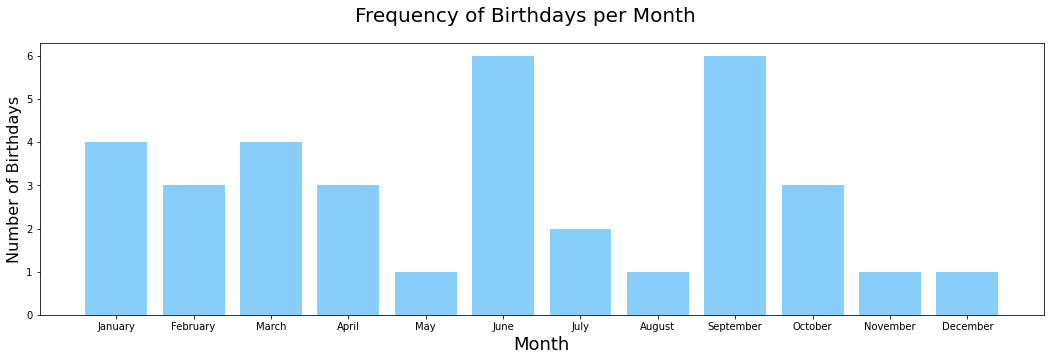

In [13]:
"""
Histograms are the graphical representation of data in the form of frequency. 
As we have already identified the frequency of birthdates per month, we can simply plot
a bar chart of these frequencies. 
"""
f, ax = plt.subplots(figsize=(18,5)) # Make sure the figure is a decent size
plt.bar(list(counter.keys()), counter.values(), color='lightskyblue') # Plot values with pleasing color
plt.suptitle('Frequency of Birthdays per Month', fontsize=20) # Add title
plt.xlabel('Month', fontsize=18) # Add x-axis label
plt.ylabel('Number of Birthdays', fontsize=16) # Add y-axis label
destination = input("Please provide destination path: ")
plt.savefig(destination+"Birthday_Frequency", dpi = 300, format = 'jpeg') #Save figure

## Question 4

### Part 4.1 and 4.3 Importing data into dataframe

In [14]:
file = input("Please provide file path: ") # Provide path to dataset

Please provide file path: /Users/ravinschmidl/Desktop/FDM/Python/CompleteDataset.csv


In [15]:
fifa_df = pd.read_csv(file, index_col=0)

/Users/ravinschmidl/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning:

Columns (23,36) have mixed types.Specify dtype option on import or set low_memory=False.



In [16]:
fifa_df.head()

Name  Age                                            Photo  \
0  Cristiano Ronaldo   32   https://cdn.sofifa.org/48/18/players/20801.png   
1           L. Messi   30  https://cdn.sofifa.org/48/18/players/158023.png   
2             Neymar   25  https://cdn.sofifa.org/48/18/players/190871.png   
3          L. Suárez   30  https://cdn.sofifa.org/48/18/players/176580.png   
4           M. Neuer   31  https://cdn.sofifa.org/48/18/players/167495.png   

  Nationality                                 Flag  Overall  Potential  \
0    Portugal  https://cdn.sofifa.org/flags/38.png       94         94   
1   Argentina  https://cdn.sofifa.org/flags/52.png       93         93   
2      Brazil  https://cdn.sofifa.org/flags/54.png       92         94   
3     Uruguay  https://cdn.sofifa.org/flags/60.png       92         92   
4     Germany  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club                                   Club Logo   Value  \
0       Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png  €95.5M   
1         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   €105M   
2  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png   €123M   
3         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png    €97M   
4     FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png    €61M   

   ... Reactions  Short passing Shot power Sliding tackle Sprint speed  \
0  ...        96             83         94             23           91   
1  ...        95             88         85             26           87   
2  ...        88             81         80             33           90   
3  ...        93             83         87             38           77   
4  ...        85             55         25             11           61   

  Stamina Standing tackle Strength Vision Volleys  
0      92              31       80     85      88  
1      73              28       59     90      85  
2      78              24       53     80      83  
3      89              45       80     84      88  
4      44              10       83     70      11  

[5 rows x 47 columns]

In [17]:
fifa_df.dtypes

Name                  object
Age                    int64
Photo                 object
Nationality           object
Flag                  object
Overall                int64
Potential              int64
Club                  object
Club Logo             object
Value                 object
Wage                  object
Special                int64
Acceleration          object
Aggression            object
Agility               object
Balance               object
Ball control          object
Composure             object
Crossing              object
Curve                 object
Dribbling             object
Finishing             object
Free kick accuracy    object
GK diving             object
GK handling           object
GK kicking            object
GK positioning        object
GK reflexes           object
Heading accuracy      object
ID                     int64
Interceptions         object
Jumping               object
Long passing          object
Long shots            object
Marking       

### Part 4.2 Cleaning Data/Removing Special Characters

In [18]:
len(fifa_df) # The number of rows that shouldn't have special chars

17981

In [19]:
for col in fifa_df: # For each col print the num of rows that don't contain special chars
    print(sum(fifa_df[col].astype(str).str.isalnum()))

910
17981
0
15845
0
17981
17981
2912
0
0
0
17981
17897
17913
17910
17924
17840
17887
17885
17908
17850
17867
17932
17955
17954
17962
17955
17952
17906
17981
17881
17911
17860
17898
17869
17951
17886
17866
17832
17908
17886
17867
17873
17857
17877
17874
17940


In [20]:
""" We can see multiple + and - signs in the attributes section, 
 we will remove all characters after these symbols.
"""
fifa_df[fifa_df['Crossing'].str.isalnum() == False].head()

Name  Age                                            Photo  \
302         Malcom   20  https://cdn.sofifa.org/48/18/players/222737.png   
398    Alex Telles   24  https://cdn.sofifa.org/48/18/players/212462.png   
412  T. Stepanenko   27  https://cdn.sofifa.org/48/18/players/206413.png   
481    D. Criscito   30  https://cdn.sofifa.org/48/18/players/173208.png   
519     M. Almirón   23  https://cdn.sofifa.org/48/18/players/230977.png   

    Nationality                                 Flag  Overall  Potential  \
302      Brazil  https://cdn.sofifa.org/flags/54.png       81         87   
398      Brazil  https://cdn.sofifa.org/flags/54.png       80         84   
412     Ukraine  https://cdn.sofifa.org/flags/49.png       80         81   
481       Italy  https://cdn.sofifa.org/flags/27.png       80         80   
519    Paraguay  https://cdn.sofifa.org/flags/58.png       79         83   

                      Club                                      Club Logo  \
302  Girondins de Bordeaux      https://cdn.sofifa.org/24/18/teams/59.png   
398               FC Porto     https://cdn.sofifa.org/24/18/teams/236.png   
412       Shakhtar Donetsk  https://cdn.sofifa.org/24/18/teams/101059.png   
481   Zenit St. Petersburg  https://cdn.sofifa.org/24/18/teams/100769.png   
519      Atlanta United FC  https://cdn.sofifa.org/24/18/teams/112885.png   

      Value  ... Reactions  Short passing Shot power Sliding tackle  \
302  €24.5M  ...      79+2           79+2       81+1             17   
398    €16M  ...        80             76         75             76   
412    €14M  ...        78             81         75           77-1   
481  €10.5M  ...        78             77         68             82   
519  €16.5M  ...        79             79         78             59   

    Sprint speed Stamina Standing tackle Strength Vision Volleys  
302           80      74              28       63     79    69+3  
398           84      89              77       64     67      66  
412           64      82              79       78     69      56  
481           77      90              80       73     71      62  
519           88      81              66       50     78      75  

[5 rows x 47 columns]

In [21]:
for column in fifa_df: # Remove values after + or - symbols.
    fifa_df[column] = fifa_df[column].astype(str).str.split('+').str[0]
    fifa_df[column] = fifa_df[column].astype(str).str.split('-').str[0]

In [22]:
"""
Names may have accents so we will de-accent them and maintain ascii alphanumerics only
"""
fifa_df["Name"] = fifa_df["Name"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
fifa_df["Club"] = fifa_df["Club"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
fifa_df["Nationality"] = fifa_df["Nationality"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [23]:
# Check to see if + or - still exists
fifa_df[fifa_df['Crossing'].str.isalnum() == False].head()

Empty DataFrame
Columns: [Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Special, Acceleration, Aggression, Agility, Balance, Ball control, Composure, Crossing, Curve, Dribbling, Finishing, Free kick accuracy, GK diving, GK handling, GK kicking, GK positioning, GK reflexes, Heading accuracy, ID, Interceptions, Jumping, Long passing, Long shots, Marking, Penalties, Positioning, Reactions, Short passing, Shot power, Sliding tackle, Sprint speed, Stamina, Standing tackle, Strength, Vision, Volleys]
Index: []

[0 rows x 47 columns]

In [24]:
# Check names (look at suarez for example)
fifa_df.head()

Name Age                                            Photo  \
0  Cristiano Ronaldo  32   https://cdn.sofifa.org/48/18/players/20801.png   
1           L. Messi  30  https://cdn.sofifa.org/48/18/players/158023.png   
2             Neymar  25  https://cdn.sofifa.org/48/18/players/190871.png   
3          L. Suarez  30  https://cdn.sofifa.org/48/18/players/176580.png   
4           M. Neuer  31  https://cdn.sofifa.org/48/18/players/167495.png   

  Nationality                                 Flag Overall Potential  \
0    Portugal  https://cdn.sofifa.org/flags/38.png      94        94   
1   Argentina  https://cdn.sofifa.org/flags/52.png      93        93   
2      Brazil  https://cdn.sofifa.org/flags/54.png      92        94   
3     Uruguay  https://cdn.sofifa.org/flags/60.png      92        92   
4     Germany  https://cdn.sofifa.org/flags/21.png      92        92   

               Club                                   Club Logo   Value  ...  \
0    Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png  €95.5M  ...   
1      FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   €105M  ...   
2       Paris Saint   https://cdn.sofifa.org/24/18/teams/73.png   €123M  ...   
3      FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png    €97M  ...   
4  FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png    €61M  ...   

  Reactions Short passing Shot power Sliding tackle Sprint speed Stamina  \
0        96            83         94             23           91      92   
1        95            88         85             26           87      73   
2        88            81         80             33           90      78   
3        93            83         87             38           77      89   
4        85            55         25             11           61      44   

  Standing tackle Strength Vision Volleys  
0              31       80     85      88  
1              28       59     90      85  
2              24       53     80      83  
3              45       80     84      88  
4              10       83     70      11  

[5 rows x 47 columns]

In [25]:
# In the above check, we see wages and values with M and K as values. Let's make these Int's.
fifa_df['Wage'] = fifa_df['Wage'].str.replace('€', '') # First remove the special character
fifa_df["Wage"] = fifa_df["Wage"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [26]:
fifa_df['Value'] = fifa_df['Value'].str.replace('€', '') # First remove the special character
fifa_df["Value"] = fifa_df["Value"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [27]:
fifa_df.head() # Looks good.

Name Age                                            Photo  \
0  Cristiano Ronaldo  32   https://cdn.sofifa.org/48/18/players/20801.png   
1           L. Messi  30  https://cdn.sofifa.org/48/18/players/158023.png   
2             Neymar  25  https://cdn.sofifa.org/48/18/players/190871.png   
3          L. Suarez  30  https://cdn.sofifa.org/48/18/players/176580.png   
4           M. Neuer  31  https://cdn.sofifa.org/48/18/players/167495.png   

  Nationality                                 Flag Overall Potential  \
0    Portugal  https://cdn.sofifa.org/flags/38.png      94        94   
1   Argentina  https://cdn.sofifa.org/flags/52.png      93        93   
2      Brazil  https://cdn.sofifa.org/flags/54.png      92        94   
3     Uruguay  https://cdn.sofifa.org/flags/60.png      92        92   
4     Germany  https://cdn.sofifa.org/flags/21.png      92        92   

               Club                                   Club Logo      Value  \
0    Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png   95500000   
1      FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png  105000000   
2       Paris Saint   https://cdn.sofifa.org/24/18/teams/73.png  123000000   
3      FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   97000000   
4  FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png   61000000   

   ...  Reactions Short passing Shot power Sliding tackle Sprint speed  \
0  ...         96            83         94             23           91   
1  ...         95            88         85             26           87   
2  ...         88            81         80             33           90   
3  ...         93            83         87             38           77   
4  ...         85            55         25             11           61   

  Stamina Standing tackle Strength Vision Volleys  
0      92              31       80     85      88  
1      73              28       59     90      85  
2      78              24       53     80      83  
3      89              45       80     84      88  
4      44              10       83     70      11  

[5 rows x 47 columns]

In [28]:
#Remove the rest of the non-alphanumeric 'special' characters
for column in fifa_df:
    fifa_df[column] = fifa_df[column].astype(str).str.replace('[^a-zA-Z0-9]', '')

In [29]:
# In case we had special values within these columns we needed to coerce them to str. 
# Coerce them back to ints. 
int_cols = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Acceleration', 
        'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 
        'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 
        'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 
        'ID', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
        'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 
        'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys',  
       ]
fifa_df[int_cols] = fifa_df[int_cols].apply(pd.to_numeric, errors='coerce', axis=1)

### Part 4.9 Dropping unused columns (completed early)

In [30]:
# Drop columns with links that we do not need. 
fifa_df = fifa_df.drop(columns = ['Photo', 'Flag', 'Club Logo', 'ID'])

In [31]:
#Looks nice and clean. 
fifa_df.head()

Name  Age Nationality  Overall  Potential            Club  \
0  CristianoRonaldo   32    Portugal       94         94    RealMadridCF   
1            LMessi   30   Argentina       93         93     FCBarcelona   
2            Neymar   25      Brazil       92         94      ParisSaint   
3           LSuarez   30     Uruguay       92         92     FCBarcelona   
4            MNeuer   31     Germany       92         92  FCBayernMunich   

       Value    Wage  Special  Acceleration  ...  Reactions  Short passing  \
0   95500000  565000     2228            89  ...         96             83   
1  105000000  565000     2154            92  ...         95             88   
2  123000000  280000     2100            94  ...         88             81   
3   97000000  510000     2291            88  ...         93             83   
4   61000000  230000     1493            58  ...         85             55   

   Shot power  Sliding tackle  Sprint speed  Stamina  Standing tackle  \
0          94              23            91       92               31   
1          85              26            87       73               28   
2          80              33            90       78               24   
3          87              38            77       89               45   
4          25              11            61       44               10   

   Strength  Vision  Volleys  
0        80      85       88  
1        59      90       85  
2        53      80       83  
3        80      84       88  
4        83      70       11  

[5 rows x 43 columns]

### Part 4.4 Simple Statistics

In [32]:
# Summary Statistics for python DF
fifa_df.describe()

Age       Overall     Potential         Value           Wage  \
count  17981.000000  17981.000000  17981.000000  1.798100e+04   17981.000000   
mean      25.144541     66.247984     71.190813  2.385390e+06   11546.966242   
std        4.614272      6.987965      6.102199  5.353970e+06   23080.000139   
min       16.000000     46.000000     46.000000  0.000000e+00       0.000000   
25%       21.000000     62.000000     67.000000  3.000000e+05    2000.000000   
50%       25.000000     66.000000     71.000000  6.750000e+05    4000.000000   
75%       28.000000     71.000000     75.000000  2.100000e+06   12000.000000   
max       47.000000     94.000000     94.000000  1.230000e+08  565000.000000   

            Special  Acceleration    Aggression       Agility       Balance  \
count  17981.000000  17981.000000  17981.000000  17981.000000  17981.000000   
mean    1594.095100     64.600578     55.822257     63.342417     63.815528   
std      272.151435     14.907052     17.468440     14.791361     14.094377   
min      728.000000     11.000000     11.000000     14.000000     11.000000   
25%     1449.000000     56.000000     43.000000     55.000000     56.000000   
50%     1633.000000     67.000000     59.000000     65.000000     66.000000   
75%     1786.000000     75.000000     69.000000     74.000000     74.000000   
max     2291.000000     96.000000     96.000000     96.000000     96.000000   

       ...     Reactions  Short passing    Shot power  Sliding tackle  \
count  ...  17981.000000   17981.000000  17981.000000    17981.000000   
mean   ...     61.904844      58.302931     55.661031       45.572048   
std    ...      9.171952      14.922538     17.398559       21.484684   
min    ...     28.000000      10.000000      3.000000        4.000000   
25%    ...     55.000000      53.000000     46.000000       24.000000   
50%    ...     62.000000      62.000000     59.000000       52.000000   
75%    ...     68.000000      68.000000     69.000000       64.000000   
max    ...     96.000000      92.000000     94.000000       91.000000   

       Sprint speed       Stamina  Standing tackle      Strength  \
count  17981.000000  17981.000000     17981.000000  17981.000000   
mean      64.832212     63.261109        47.446026     65.291363   
std       14.637391     15.922908        21.834465     12.617383   
min       11.000000     12.000000         4.000000     12.000000   
25%       57.000000     56.000000        26.000000     58.000000   
50%       67.000000     66.000000        54.000000     66.000000   
75%       75.000000     74.000000        66.000000     74.000000   
max       96.000000     95.000000        92.000000     98.000000   

             Vision       Volleys  
count  17981.000000  17981.000000  
mean      53.022635     43.227852  
std       14.387463     17.735041  
min       10.000000      4.000000  
25%       43.000000     30.000000  
50%       55.000000     44.000000  
75%       64.000000     57.000000  
max       94.000000     91.000000  

[8 rows x 40 columns]

In [33]:
# 1. Averages for all Int columns. 
fifa_df.mean().astype(int)

Age                        25
Overall                    66
Potential                  71
Value                 2385389
Wage                    11546
Special                  1594
Acceleration               64
Aggression                 55
Agility                    63
Balance                    63
Ball control               58
Composure                  57
Crossing                   49
Curve                      47
Dribbling                  55
Finishing                  45
Free kick accuracy         43
GK diving                  16
GK handling                16
GK kicking                 16
GK positioning             16
GK reflexes                16
Heading accuracy           52
Interceptions              46
Jumping                    64
Long passing               52
Long shots                 47
Marking                    44
Penalties                  48
Positioning                49
Reactions                  61
Short passing              58
Shot power                 55
Sliding ta

In [34]:
# 2. Max value for all Int columns. 
fifa_df.max(numeric_only=True).astype(int)

Age                          47
Overall                      94
Potential                    94
Value                 123000000
Wage                     565000
Special                    2291
Acceleration                 96
Aggression                   96
Agility                      96
Balance                      96
Ball control                 95
Composure                    96
Crossing                     91
Curve                        92
Dribbling                    97
Finishing                    95
Free kick accuracy           93
GK diving                    91
GK handling                  91
GK kicking                   95
GK positioning               91
GK reflexes                  90
Heading accuracy             94
Interceptions                92
Jumping                      95
Long passing                 93
Long shots                   92
Marking                      92
Penalties                    92
Positioning                  95
Reactions                    96
Short pa

In [35]:
# 3. Min value for all Int columns. 
fifa_df.min(numeric_only=True).astype(int)

Age                    16
Overall                46
Potential              46
Value                   0
Wage                    0
Special               728
Acceleration           11
Aggression             11
Agility                14
Balance                11
Ball control            8
Composure               5
Crossing                5
Curve                   6
Dribbling               2
Finishing               2
Free kick accuracy      4
GK diving               1
GK handling             1
GK kicking              1
GK positioning          1
GK reflexes             1
Heading accuracy        4
Interceptions           4
Jumping                13
Long passing            7
Long shots              3
Marking                 4
Penalties               5
Positioning             2
Reactions              28
Short passing          10
Shot power              3
Sliding tackle          4
Sprint speed           11
Stamina                12
Standing tackle         4
Strength               12
Vision      

In [36]:
# 4. Standard deviation
fifa_df.std(numeric_only=True).astype(int)

Age                         4
Overall                     6
Potential                   6
Value                 5353969
Wage                    23080
Special                   272
Acceleration               14
Aggression                 17
Agility                    14
Balance                    14
Ball control               16
Composure                  12
Crossing                   18
Curve                      18
Dribbling                  18
Finishing                  19
Free kick accuracy         17
GK diving                  17
GK handling                17
GK kicking                 16
GK positioning             17
GK reflexes                18
Heading accuracy           17
Interceptions              20
Jumping                    11
Long passing               15
Long shots                 19
Marking                    21
Penalties                  15
Positioning                19
Reactions                   9
Short passing              14
Shot power                 17
Sliding ta

In [37]:
# 5. Mode (value with highest frequency)
fifa_df.mode(numeric_only=True).astype(int)

Age  Overall  Potential    Value  Wage  Special  Acceleration  Aggression  \
0   25       66         70  1100000  1000     1755            68          70   

   Agility  Balance  ...  Reactions  Short passing  Shot power  \
0       72       68  ...         64             64          68   

   Sliding tackle  Sprint speed  Stamina  Standing tackle  Strength  Vision  \
0              62            68       72               66        72      58   

   Volleys  
0       48  

[1 rows x 40 columns]

### Part 4.5 Sort by wage and club

In [38]:
fifa_df_sort1 = fifa_df.sort_values(['Wage', 'Club'],
                                    ascending = [False, False])

In [39]:
fifa_df_sort1

Name  Age Nationality  Overall  Potential            Club  \
0      CristianoRonaldo   32    Portugal       94         94    RealMadridCF   
1                LMessi   30   Argentina       93         93     FCBarcelona   
3               LSuarez   30     Uruguay       92         92     FCBarcelona   
15                GBale   27       Wales       89         89    RealMadridCF   
5          RLewandowski   28      Poland       91         91  FCBayernMunich   
...                 ...  ...         ...      ...        ...             ...   
17253          FCardozo   29       India       53         53             nan   
17467            CSingh   20       India       52         61             nan   
17470            ASingh   24       India       52         56             nan   
17492            SPassi   22       India       52         61             nan   
17553       SBrotherton   20  NewZealand       52         65             nan   

           Value    Wage  Special  Acceleration  ...  Reactions  \
0       95500000  565000     2228            89  ...         96   
1      105000000  565000     2154            92  ...         95   
3       97000000  510000     2291            88  ...         93   
15      69500000  370000     2263            93  ...         87   
5       92000000  355000     2143            79  ...         91   
...          ...     ...      ...           ...  ...        ...   
17253          0       0     1211            60  ...         47   
17467          0       0     1237            71  ...         48   
17470          0       0     1040            44  ...         51   
17492          0       0     1321            66  ...         49   
17553          0       0     1177            54  ...         37   

       Short passing  Shot power  Sliding tackle  Sprint speed  Stamina  \
0                 83          94              23            91       92   
1                 88          85              26            87       73   
3                 83          87              38            77       89   
15                86          91              52            95       76   
5                 83          88              19            83       79   
...              ...         ...             ...           ...      ...   
17253             30          38              54            64       62   
17467             36          31              53            73       58   
17470             30          21              17            43       30   
17492             38          50              21            68       59   
17553             36          33              55            62       51   

       Standing tackle  Strength  Vision  Volleys  
0                   31        80      85       88  
1                   28        59      90       85  
3                   45        80      84       88  
15                  55        80      79       76  
5                   42        84      78       87  
...                ...       ...     ...      ...  
17253               61        58      26       23  
17467               49        76      32       20  
17470               17        67      36       21  
17492               23        62      43       38  
17553               53        74      28       24  

[17981 rows x 43 columns]

### Part 4.6 Group by countries

In [40]:
fifa_df_group1 = fifa_df.groupby("Nationality").Name.count().sort_values(ascending=False)

In [41]:
fifa_df_group1

Nationality
England            1630
Germany            1140
Spain              1019
France              978
Argentina           965
                   ... 
SaoTomePrincipe       1
SanMarino             1
Burundi               1
Mauritius             1
Guam                  1
Name: Name, Length: 165, dtype: int64

### Part 4.7 Group by Age and find average potential per group

In [42]:
fifa_df_group2 = fifa_df.groupby("Age").Potential.mean().sort_values(ascending=False)

In [43]:
fifa_df_group2

Age
16    76.538462
17    73.492248
19    72.815716
21    72.790047
20    72.717269
18    72.654762
22    72.542296
23    72.489957
24    72.090705
25    70.836399
26    70.574875
44    70.500000
30    69.853234
31    69.767511
29    69.763604
33    69.709887
27    69.697917
32    69.468379
28    69.304472
35    69.151832
36    69.080882
34    68.911765
38    68.666667
37    68.536232
39    67.900000
40    67.625000
41    64.333333
43    55.000000
47    46.000000
Name: Potential, dtype: float64

### Part 4.8 Visualise Data

#### Star Chart of Top 3 Players and Bottom 3 Players
##### Matplotlib

In [44]:
# The 3 Best Players
fifa_df.sort_values("Overall",
               ascending = False).head(3)

Name  Age Nationality  Overall  Potential          Club  \
0  CristianoRonaldo   32    Portugal       94         94  RealMadridCF   
1            LMessi   30   Argentina       93         93   FCBarcelona   
2            Neymar   25      Brazil       92         94    ParisSaint   

       Value    Wage  Special  Acceleration  ...  Reactions  Short passing  \
0   95500000  565000     2228            89  ...         96             83   
1  105000000  565000     2154            92  ...         95             88   
2  123000000  280000     2100            94  ...         88             81   

   Shot power  Sliding tackle  Sprint speed  Stamina  Standing tackle  \
0          94              23            91       92               31   
1          85              26            87       73               28   
2          80              33            90       78               24   

   Strength  Vision  Volleys  
0        80      85       88  
1        59      90       85  
2        53      80       83  

[3 rows x 43 columns]

In [45]:
# The 3 worst players
fifa_df.sort_values("Overall",
               ascending = False).tail(3)

Name  Age Nationality  Overall  Potential              Club  \
17978      JYoung   17    Scotland       46         61       SwindonTown   
17979  JLundstram   18     England       46         64    CreweAlexandra   
17980     LSackey   18       Ghana       46         64  ScunthorpeUnited   

       Value  Wage  Special  Acceleration  ...  Reactions  Short passing  \
17978  60000  1000     1194            66  ...         54             42   
17979  60000  1000     1302            57  ...         49             49   
17980  50000  1000     1031            48  ...         40             31   

       Shot power  Sliding tackle  Sprint speed  Stamina  Standing tackle  \
17978          42              14            51       33               17   
17979          43              47            58       49               48   
17980          21              43            49       55               44   

       Strength  Vision  Volleys  
17978        32      37       33  
17979        46      51       25  
17980        67      22       19  

[3 rows x 43 columns]

In [46]:
# Define players
players=['CristianoRonaldo', 'LMessi', 'LSuarez', 'TKaemodel', 'JLundstram', 'TSawyer']

# Define attributes to be displayed on star chart
labels=np.array(['Sprint speed', 'Stamina', 'Shot power', 'Finishing', 
                 'Short passing', 'Long passing', 'Dribbling','Strength',
                 'Standing tackle', 'Sliding tackle'])

# Make sure it can be displayed in a circle (hence the pi)
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles2=np.concatenate((angles,[angles[0]]))

In [47]:
# Get attribute scores for selected player
stats_cr = np.array(fifa_df[fifa_df.Name == players[0]][labels])[0]
# Make sure the values form a circle, first and last value need to be the same to join
stats_cr = np.concatenate((stats_cr,[stats_cr[0]]))

stats_lm = np.array(fifa_df[fifa_df.Name == players[1]][labels])[0]
stats_lm = np.concatenate((stats_lm,[stats_lm[0]]))

stats_ls = np.array(fifa_df[fifa_df.Name == players[2]][labels])[0]
stats_ls = np.concatenate((stats_ls,[stats_ls[0]]))

stats_tk = np.array(fifa_df[fifa_df.Name == players[3]][labels])[0]
stats_tk = np.concatenate((stats_tk,[stats_tk[0]]))

stats_jl = np.array(fifa_df[fifa_df.Name == players[4]][labels])[0]
stats_jl = np.concatenate((stats_jl,[stats_jl[0]]))

stats_ts = np.array(fifa_df[fifa_df.Name == players[5]][labels])[0]
stats_ts = np.concatenate((stats_ts,[stats_ts[0]]))

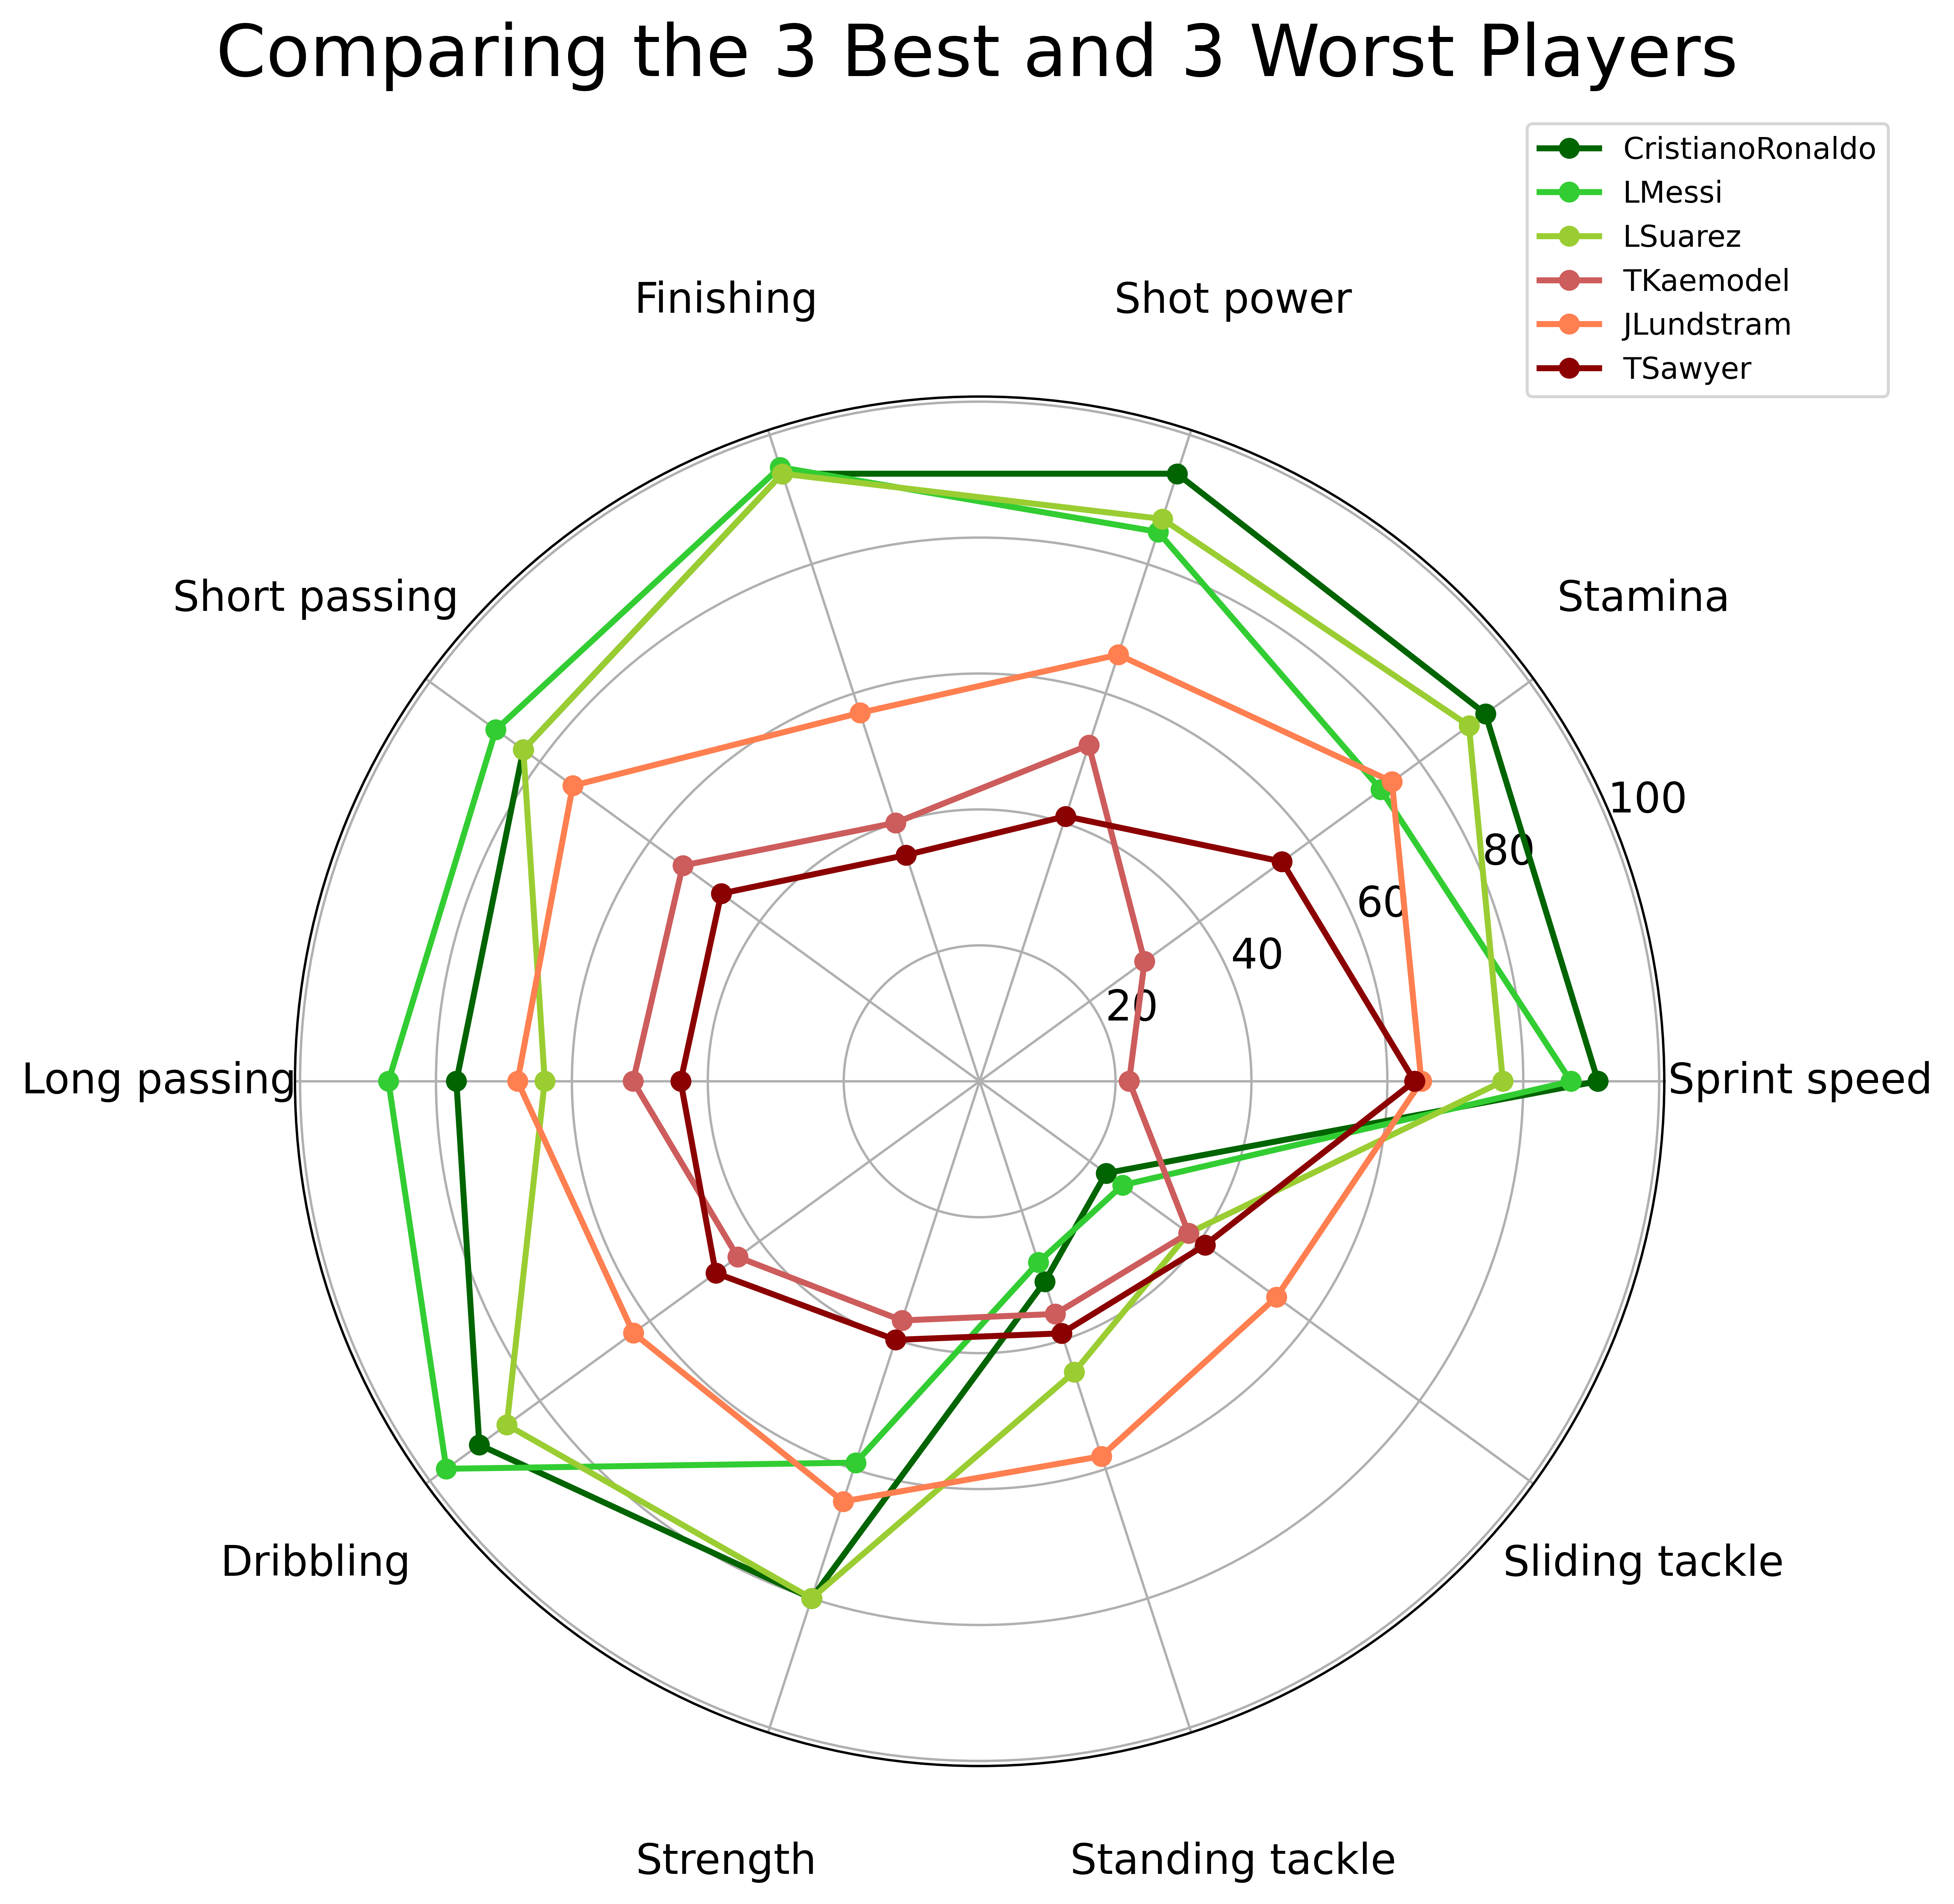

Please provide destination path: /Users/ravinschmidl/Desktop/FDM/Python/Figures/


In [48]:
fig=plt.figure(figsize=(9,9), dpi = 600) # Set size and resolution
plt.suptitle("Comparing the 3 Best and 3 Worst Players", size = 24) # Title
ax = fig.add_subplot(111, polar=True) # So we can add multiple plots that are circular

# Plot star charts for best (green) and worst (red) players
  # o- represents line graph with circles at points
ax.plot(angles2, stats_cr, 'o-', color = 'darkgreen', linewidth=2, label=players) 
ax.plot(angles2, stats_lm, 'o-', color = 'limegreen', linewidth=2, label=players)
ax.plot(angles2, stats_ls, 'o-', color = 'yellowgreen', linewidth=2, label=players)
ax.plot(angles2, stats_tk, 'o-', color = 'indianred', linewidth=2, label=players)
ax.plot(angles2, stats_jl, 'o-', color = 'coral', linewidth=2, label=players)
ax.plot(angles2, stats_ts, 'o-', color = 'darkred', linewidth=2, label=players)

ax.set_thetagrids(angles * 180/np.pi, labels) # Add labels on the circle
ax.tick_params(axis='both', labelsize=14, pad = 35) # Format tick labels
ax.grid(True)
plt.legend(players, loc = (0.9, 1), prop={'size': 10}) # Format Legend
plt.tight_layout()
plt.show()
destination = input("Please provide destination path: ")
fig.savefig(destination+"StarChart", dpi = 300, format = 'jpeg')

#### Where football players come from
##### Plotly

In [49]:
nations = fifa_df['Nationality'].value_counts() # Count number of players per nation

# England, Scotland and Wales will not color the map, because map only recognises UK.
# Create a UnitedKingdom entry in nations summing values from all UK countries
nations['UnitedKingdom'] = sum(nations[['England', 'Wales', 'Scotland','NorthernIreland']])

fig = go.Figure() # Generate figure
fig.add_trace(go.Choropleth( # Add trace to figure to allow formatting later
    locationmode = 'country names', # What type of location: names, ISO-3, states, etc?
    locations = nations.index.values, # What are the names of nations?
    text = nations.index, # Set text element associated to nation.
    z = nations.values, # Sets the color values
    colorscale = 'darkmint', # Sets the color scales
    colorbar_title = "Number of Players", # Title for the legend.
    )
)
fig.update_layout( # Update layout, mainly adding a title and defining location of title. 
title = 'Where do Footballers come from? <br> <span style="font-size: 16px;">The number of footballers from each country in Fifa 18</span>',
title_x = 0.5,
title_font_size = 27
)

fig.show()

destination = input("Please provide destination path: ")
fig.write_image(destination+"Number_of_Players_per_Country_Map", 
                format = 'jpeg', width=1800, height=1000, engine = 'kaleido')

Please provide destination path: /Users/ravinschmidl/Desktop/FDM/Python/Figures/


#### Correlation between different attributes
##### Seaborn

In [50]:
# All the columns defining player attributes.
att_cols = ['Overall', 'Potential', 'Value',
       'Wage', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

# Create a dataframe containing just these attributes. 
att_df = fifa_df[att_cols]

In [51]:
att_df.head()

Overall  Potential      Value    Wage  Acceleration  Aggression  Agility  \
0       94         94   95500000  565000            89          63       89   
1       93         93  105000000  565000            92          48       90   
2       92         94  123000000  280000            94          56       96   
3       92         92   97000000  510000            88          78       86   
4       92         92   61000000  230000            58          29       52   

   Balance  Ball control  Composure  ...  Reactions  Short passing  \
0       63            93         95  ...         96             83   
1       95            95         96  ...         95             88   
2       82            95         92  ...         88             81   
3       60            91         83  ...         93             83   
4       35            48         70  ...         85             55   

   Shot power  Sliding tackle  Sprint speed  Stamina  Standing tackle  \
0          94              23            91       92               31   
1          85              26            87       73               28   
2          80              33            90       78               24   
3          87              38            77       89               45   
4          25              11            61       44               10   

   Strength  Vision  Volleys  
0        80      85       88  
1        59      90       85  
2        53      80       83  
3        80      84       88  
4        83      70       11  

[5 rows x 38 columns]

In [52]:
# A correlation matrix of all these attributes. 
    # The more correlated the higher the value (approaches 1)
    # The less correlated the lowet the value (approaches -1)
att_df.corr()

Overall  Potential     Value      Wage  Acceleration  \
Overall             1.000000   0.683474  0.626001  0.593789      0.204208   
Potential           0.683474   1.000000  0.588074  0.519062      0.244777   
Value               0.626001   0.588074  1.000000  0.850510      0.176705   
Wage                0.593789   0.519062  0.850510  1.000000      0.146776   
Acceleration        0.204208   0.244777  0.176705  0.146776      1.000000   
Aggression          0.398523   0.188953  0.187013  0.206926      0.251775   
Agility             0.265458   0.233688  0.201782  0.174240      0.798994   
Balance             0.096650   0.133937  0.105964  0.085943      0.701170   
Ball control        0.452109   0.361380  0.309587  0.294039      0.670556   
Composure           0.629755   0.402119  0.402123  0.391802      0.437962   
Crossing            0.391711   0.254225  0.248543  0.243322      0.658374   
Curve               0.413085   0.284305  0.286347  0.268419      0.600083   
Dribbling           0.356630   0.315247  0.268668  0.249653      0.742835   
Finishing           0.321188   0.241490  0.256988  0.233912      0.597288   
Free kick accuracy  0.397937   0.238389  0.267478  0.247667      0.493229   
GK diving          -0.019722  -0.047861 -0.031683 -0.035669     -0.585516   
GK handling        -0.016366  -0.047361 -0.029676 -0.034446     -0.586196   
GK kicking         -0.024109  -0.055511 -0.034230 -0.038546     -0.583892   
GK positioning     -0.011673  -0.048464 -0.031077 -0.035431     -0.583029   
GK reflexes        -0.017631  -0.047709 -0.031613 -0.036287     -0.584118   
Heading accuracy    0.337989   0.205949  0.187648  0.205668      0.334502   
Interceptions       0.326201   0.168475  0.140973  0.163518      0.151335   
Jumping             0.270093   0.134887  0.139672  0.153624      0.214025   
Long passing        0.475162   0.329959  0.299363  0.290247      0.433993   
Long shots          0.412818   0.273407  0.280453  0.264717      0.571380   
Marking             0.245477   0.128331  0.076968  0.110622      0.136056   
Penalties           0.333871   0.223131  0.241339  0.237417      0.528526   
Positioning         0.348512   0.251507  0.261973  0.243018      0.672009   
Reactions           0.840578   0.520029  0.531255  0.502202      0.191965   
Short passing       0.488375   0.371326  0.323913  0.308240      0.561425   
Shot power          0.427811   0.291052  0.280434  0.272138      0.536658   
Sliding tackle      0.220051   0.132984  0.083657  0.116123      0.155162   
Sprint speed        0.221671   0.253069  0.181717  0.154389      0.915770   
Stamina             0.356190   0.222317  0.211665  0.203396      0.607153   
Standing tackle     0.251105   0.148793  0.103378  0.131134      0.154651   
Strength            0.352294   0.108855  0.140364  0.165548     -0.161958   
Vision              0.481185   0.341213  0.345148  0.317941      0.456469   
Volleys             0.378624   0.256449  0.287611  0.268522      0.568122   

                    Aggression   Agility   Balance  Ball control  Composure  \
Overall               0.398523  0.265458  0.096650      0.452109   0.629755   
Potential             0.188953  0.233688  0.133937      0.361380   0.402119   
Value                 0.187013  0.201782  0.105964      0.309587   0.402123   
Wage                  0.206926  0.174240  0.085943      0.294039   0.391802   
Acceleration          0.251775  0.798994  0.701170      0.670556   0.437962   
Aggression            1.000000  0.235017  0.182923      0.539641   0.582043   
Agility               0.235017  1.000000  0.765775      0.701015   0.494172   
Balance               0.182923  0.765775  1.000000      0.596927   0.374127   
Ball control          0.539641  0.701015  0.596927      1.000000   0.763911   
Composure             0.582043  0.494172  0.374127      0.763911   1.000000   
Crossing              0.467425  0.689988  0.614815      0.839893   0.647727   
Curve                 0.392908  0.674919  0.578689      0.832562   0.

In [53]:
# Initialise figure dimension and resolution so everything is visible. 
plt.figure(figsize=(30, 30), dpi = 300) 

# Create a mask, so we have a triangular correlation heatmap. 
# The correlation matrix is diagonally symmetrical, so to make it look clean, we will only use half.
mask = np.triu(np.ones_like(att_df.corr(), dtype=np.bool))

# Create the heatmap.
heatmap = sns.heatmap(att_df.corr(), # Add correlation data
                      mask=mask, # Add mask
                      vmin=-1, # Min value to anchor colormap
                      vmax=1, # Max value to anchor colormap
                      annot=True, # Apply correlation annotations to cells
                      annot_kws={"size": 10}, # Format size of these annotations
                      cmap='BrBG',# Set colormap
                      cbar_kws={'label': 'Correlation'} # Set colorbar title
                     )

# Set title and axis labels. Use semi-colon to suppress output. 
plt.title('Attribute Correlation for all Players on Fifa 18', fontsize = 50);
plt.xlabel('Player Attributes', fontsize = 25);
plt.ylabel('Player Attributes', fontsize = 25);

destination = input("Please provide destination path: ")
plt.savefig(destination+"Attribute_Correlation_Heatmap", dpi = 300, format = 'jpeg')

Please provide destination path: /Users/ravinschmidl/Desktop/FDM/Python/Figures/


#### Strongest Clubs
##### Bokeh and Seaborn

In [54]:
# All the columns defining player attributes.
team_cols = ['Club','Overall', 'Potential','Acceleration', 'Aggression', 
             'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 
             'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 
             'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 
             'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 
             'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 
             'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 
             'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

# Create a dataframe containing just these attributes. 
team_df = fifa_df[team_cols]

In [55]:
team_df = team_df.groupby('Club').mean() # Calculate Mean of attributes.
team_df

Overall  Potential  Acceleration  Aggression    Agility  \
Club                                                                           
1FCHeidenheim      66.538462  71.230769     63.384615   56.115385  64.307692   
1FCKaiserslautern  64.827586  72.413793     63.172414   51.310345  63.655172   
1FCKoln            72.666667  78.166667     64.633333   62.100000  63.700000   
1FCMagdeburg       64.920000  68.960000     62.480000   55.000000  60.520000   
1FCNurnberg        67.642857  72.928571     65.178571   60.178571  63.142857   
...                      ...        ...           ...         ...        ...   
YeovilTown         59.761905  67.809524     67.047619   51.333333  60.333333   
YokohamaFMarinos   62.500000  66.500000     62.076923   50.961538  60.653846   
ZagebieLubin       64.037037  67.962963     62.703704   53.407407  60.259259   
ZenitStPetersburg  73.766667  77.466667     68.900000   58.233333  64.433333   
nan                67.334677  69.677419     64.092742   54.741935  59.814516   

                     Balance  Ball control  Composure   Crossing      Curve  \
Club                                                                          
1FCHeidenheim      59.461538     56.230769  57.000000  48.538462  47.538462   
1FCKaiserslautern  62.620690     56.103448  52.689655  44.827586  43.172414   
1FCKoln            61.733333     62.666667  61.500000  53.400000  52.333333   
1FCMagdeburg       61.280000     56.480000  53.440000  47.160000  43.120000   
1FCNurnberg        64.178571     61.285714  60.035714  55.000000  52.678571   
...                      ...           ...        ...        ...        ...   
YeovilTown         64.809524     51.904762  52.857143  43.190476  41.761905   
YokohamaFMarinos   64.615385     54.000000  50.076923  46.346154  44.500000   
ZagebieLubin       61.592593     53.888889  55.333333  47.962963  43.777778   
ZenitStPetersburg  64.066667     62.666667  66.666667  57.966667  53.466667   
nan                63.709677     53.887097  55.169355  48.008065  43.830645   

                   ...  Reactions  Short passing  Shot power  Sliding tackle  \
Club               ...                                                         
1FCHeidenheim      ...  62.807692      56.538462   58.846154       42.615385   
1FCKaiserslautern  ...  58.517241      56.379310   53.517241       39.344828   
1FCKoln            ...  69.700000      65.133333   58.966667       52.200000   
1FCMagdeburg       ...  61.280000      55.400000   52.600000       43.080000   
1FCNurnberg        ...  63.285714      61.071429   58.178571       48.285714   
...                ...        ...            ...         ...             ...   
YeovilTown         ...  53.190476      49.000000   46.523810       43.666667   
YokohamaFMarinos   ...  56.576923      55.576923   50.192308       40.038462   
ZagebieLubin       ...  58.222222      55.000000   50.592593       46.518519   
ZenitStPetersburg  ...  69.266667      65.133333   60.533333       54.800000   
nan                ...  62.782258      55.552419   51.802419       47.403226   

                   Sprint speed    Stamina  Standing tackle   Strength  \
Club                                                                     
1FCHeidenheim         66.153846  63.269231        44.423077  68.076923   
1FCKaiserslautern     66.482759  61.275862        40.793103  65.758621   
1FCKoln               65.866667  65.266667        55.566667  69.500000   
1FCMagdeburg          64.360000  65.200000        44.240000  68.880000   
1FCNurnberg           66.285714  63.678571        53.428571  68.285714   
...                         ...        ...              ...        ...   
YeovilTown            65.333333  59.619048        45.857143  65.000000   
YokohamaFMarinos      61.538462  62.000000        41.461538  62.384615   
ZagebieLubin          60.629630  64.037037        47.555556  68.185185   
ZenitStPetersburg     69.066667  67.966667        53.733333  66.600000   
nan                   6

In [56]:
team_df = team_df[team_df.index != 'nan'] # Remove nan club

In [57]:
team_df['Average']= team_df.mean(axis=1) 
teamScores_avg = team_df['Average'].sort_values(ascending = False) # Sort values
teamScores_avg

/Users/ravinschmidl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Club
FCBarcelona         61.224444
Juventus            59.466880
RealMadridCF        59.145299
ManchesterUnited    58.607026
ParisSaint          58.271825
                      ...    
BrayWanderers       42.789683
LimerickFC          42.750000
OhodClub            42.426852
GalwayUnited        42.047778
FinnHarps           42.001111
Name: Average, Length: 647, dtype: float64

In [58]:
teamOverall_avg = team_df['Overall'].sort_values(ascending = False) # Calculate Average Overall
teamOverall_avg

Club
FCBarcelona       82.560000
Juventus          81.653846
RealMadridCF      81.038462
FCBayernMunich    79.423077
ParisSaint        77.964286
                    ...    
BohemianFC        55.800000
LimerickFC        55.636364
FinnHarps         55.200000
DroghedaUnited    54.760000
GalwayUnited      54.040000
Name: Overall, Length: 647, dtype: float64

In [59]:
team_value = fifa_df[['Club', 'Value']] 
team_value = team_value.groupby('Club').sum() # Calculate Average value
team_value = team_value[team_value.index != 'nan'] # Remove nan
team_value

Value
Club                        
1FCHeidenheim       29660000
1FCKaiserslautern   35439999
1FCKoln            206360000
1FCMagdeburg        14880000
1FCNurnberg         42980000
...                      ...
WycombeWanderers     7265000
YeovilTown           6020000
YokohamaFMarinos    17180000
ZagebieLubin        15045000
ZenitStPetersburg  213060000

[647 rows x 1 columns]

In [60]:
# Create dataframe with average attribute, average overall and average value
team_strength = pd.concat([teamScores_avg, teamOverall_avg, team_value], axis=1)
team_strength

Average    Overall      Value
FCBarcelona       61.224444  82.560000  744500000
Juventus          59.466880  81.653846  617099999
RealMadridCF      59.145299  81.038462  826700000
ManchesterUnited  58.607026  77.705882  625300000
ParisSaint        58.271825  77.964286  631750000
...                     ...        ...        ...
BrayWanderers     42.789683  56.238095    2370000
LimerickFC        42.750000  55.636364    2460000
OhodClub          42.426852  56.766667    5520000
GalwayUnited      42.047778  54.040000    2840000
FinnHarps         42.001111  55.200000    2970000

[647 rows x 3 columns]

In [61]:
# 2-Dimensional Plot of Average Overall player rating and Average player attributes
x = team_strength["Value"] 
y = team_strength["Overall"]
z = team_strength["Average"]

source = ColumnDataSource(
    data=dict(
        x=z, # X axis
        y=y, # Y axis
        label=x.index # Labels
    )
)

# Display Team name when hovering over scatter point
TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover,previewsave" 
p = figure(title="Strength of Teams", tools=TOOLS) # Title
p.circle('x', 'y', color="#2222aa", line_width=2, source=source) # Plot

hover =p.select(dict(type=HoverTool)) # Set up hover functionality
hover.tooltips = OrderedDict([
    ("index", "$index"),
    ("(xx,yy)", "(@x, @y)"),
    ("label", "@label"),
])
p.xaxis.axis_label = 'Average Attribute Score for all Players in Team' # X-axis label
p.yaxis.axis_label = 'Average Overall for all Players in Team' # Y-axis Label

show(p)

<IPython.core.display.Javascript object>


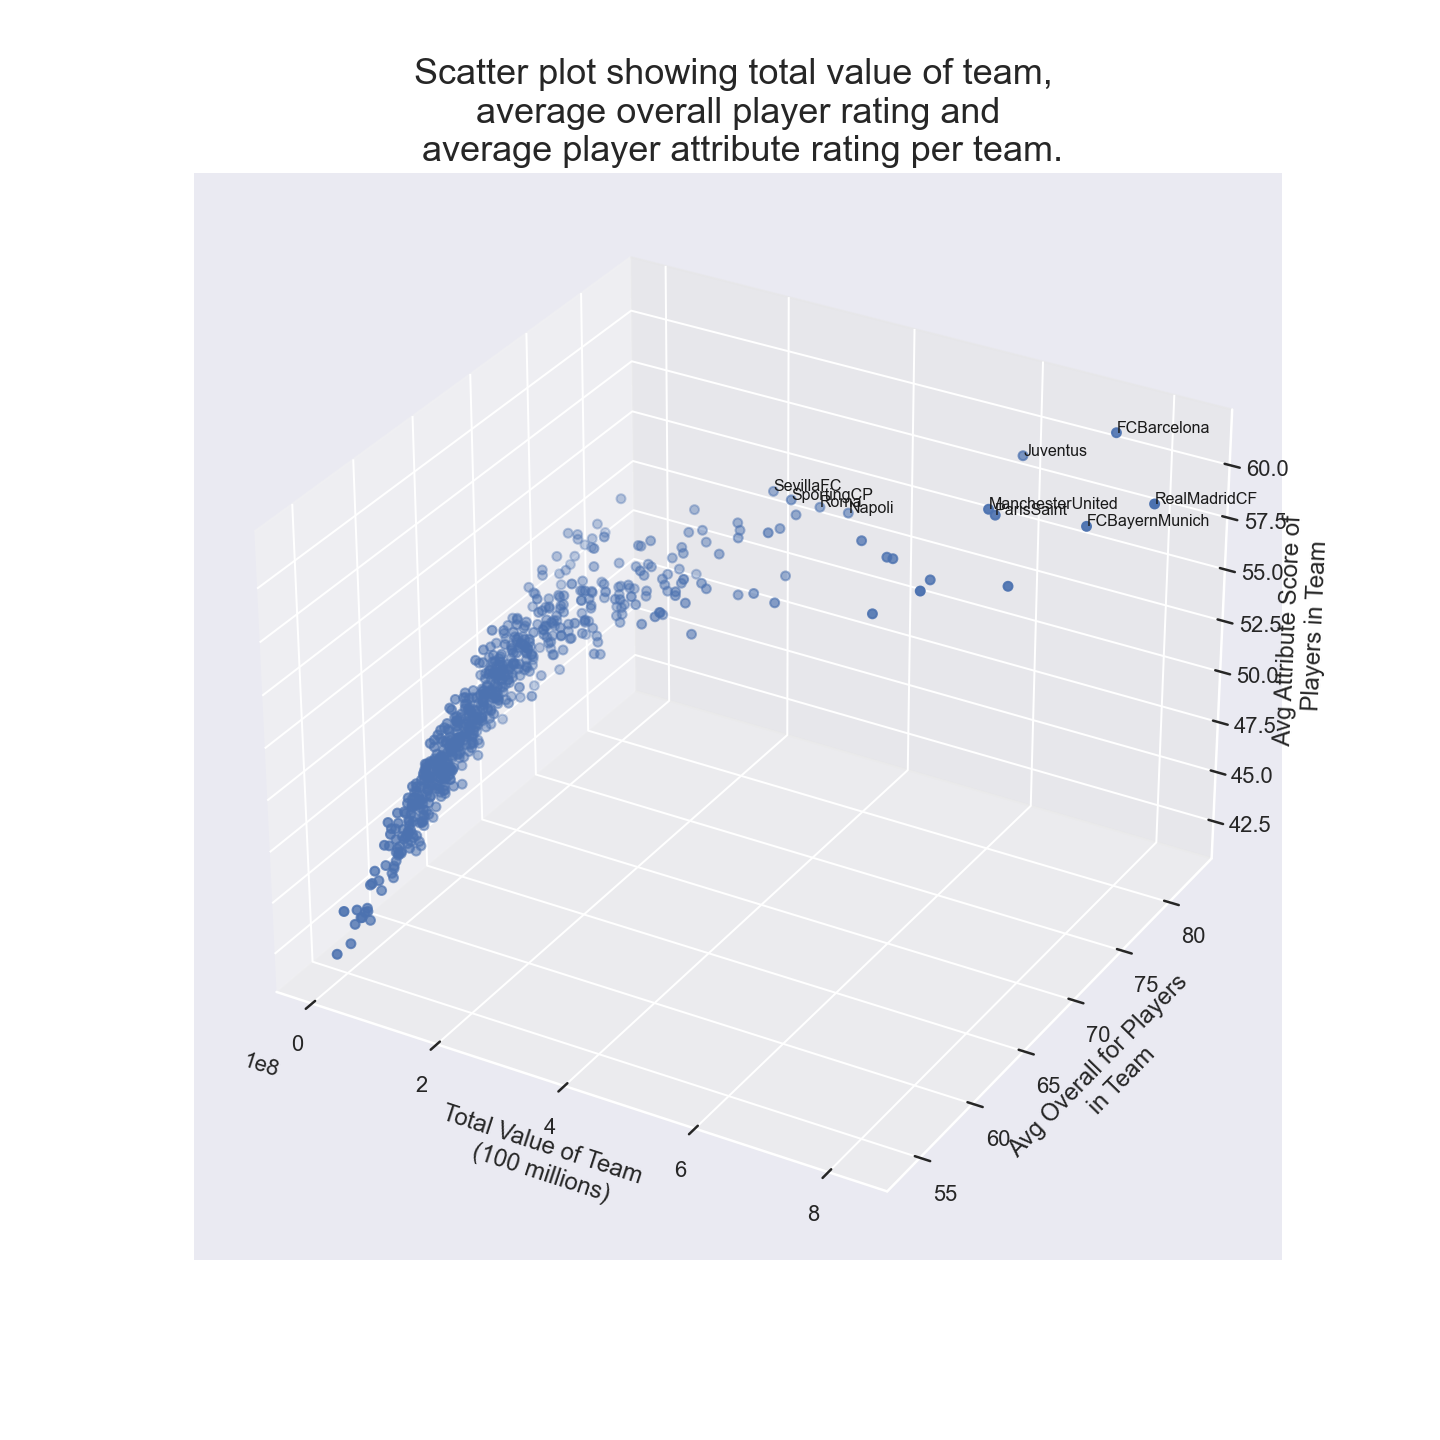

Please provide destination path: /Users/ravinschmidl/Desktop/FDM/Python/Figures/


In [66]:
# Would be interesting to see how strength compares to value
# Bokeh does not support 3D plotting, so we will use seaborn

# To be able to interact with graph
%matplotlib notebook 

sns.set(style = "darkgrid")
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d') # Need to have a 3D projection

ax.set_xlabel("Total Value of Team \n (100 millions)") # X-axis label
ax.set_ylabel("Avg Overall for Players \n in Team") # Y-axis label
ax.set_zlabel("Avg Attribute Score of \n Players in Team") # Z-axis label

ax.scatter(x, y, z) # Create scatter plot in 3 Dimensions

n = x.index[:10] # Top 10 teams
for i in range(len(n)): # Highlight name of top 10 strongest, most valuable teams. 
    ax.text(x[i], y[i], z[i],
            '%s' % (str(n[i])), 
            size=8,
            color='k', 
            wrap = False) 
plt.title("Scatter plot showing total value of team, \n average overall player rating and \n average player attribute rating per team.", 
         size = 18)
destination = input("Please provide destination path: ")
plt.savefig(destination+"3D_Scatter_TeamStrength_vs_Value", dpi = 300, format = 'jpeg')
plt.show()


#### Relationship between age and wage
##### Seaborn

In [63]:
age_wage = fifa_df.groupby('Age').mean()['Wage']

In [64]:
age_wage

Age
16     1846.153846
17     2174.418605
18     2729.166667
19     3567.820393
20     6338.955823
21     7503.110420
22     8878.398792
23    10761.119082
24    11506.746627
25    13065.045992
26    15435.940100
27    16045.138889
28    16672.692674
29    15601.248885
30    18838.308458
31    16874.813711
32    15515.810277
33    12871.961102
34    13000.000000
35     9591.623037
36     8463.235294
37     7695.652174
38     5805.555556
39     9550.000000
40     9250.000000
41     2000.000000
43     1000.000000
44     8000.000000
47     1000.000000
Name: Wage, dtype: float64

Please provide destination path: /Users/ravinschmidl/Desktop/FDM/Python/Figures/


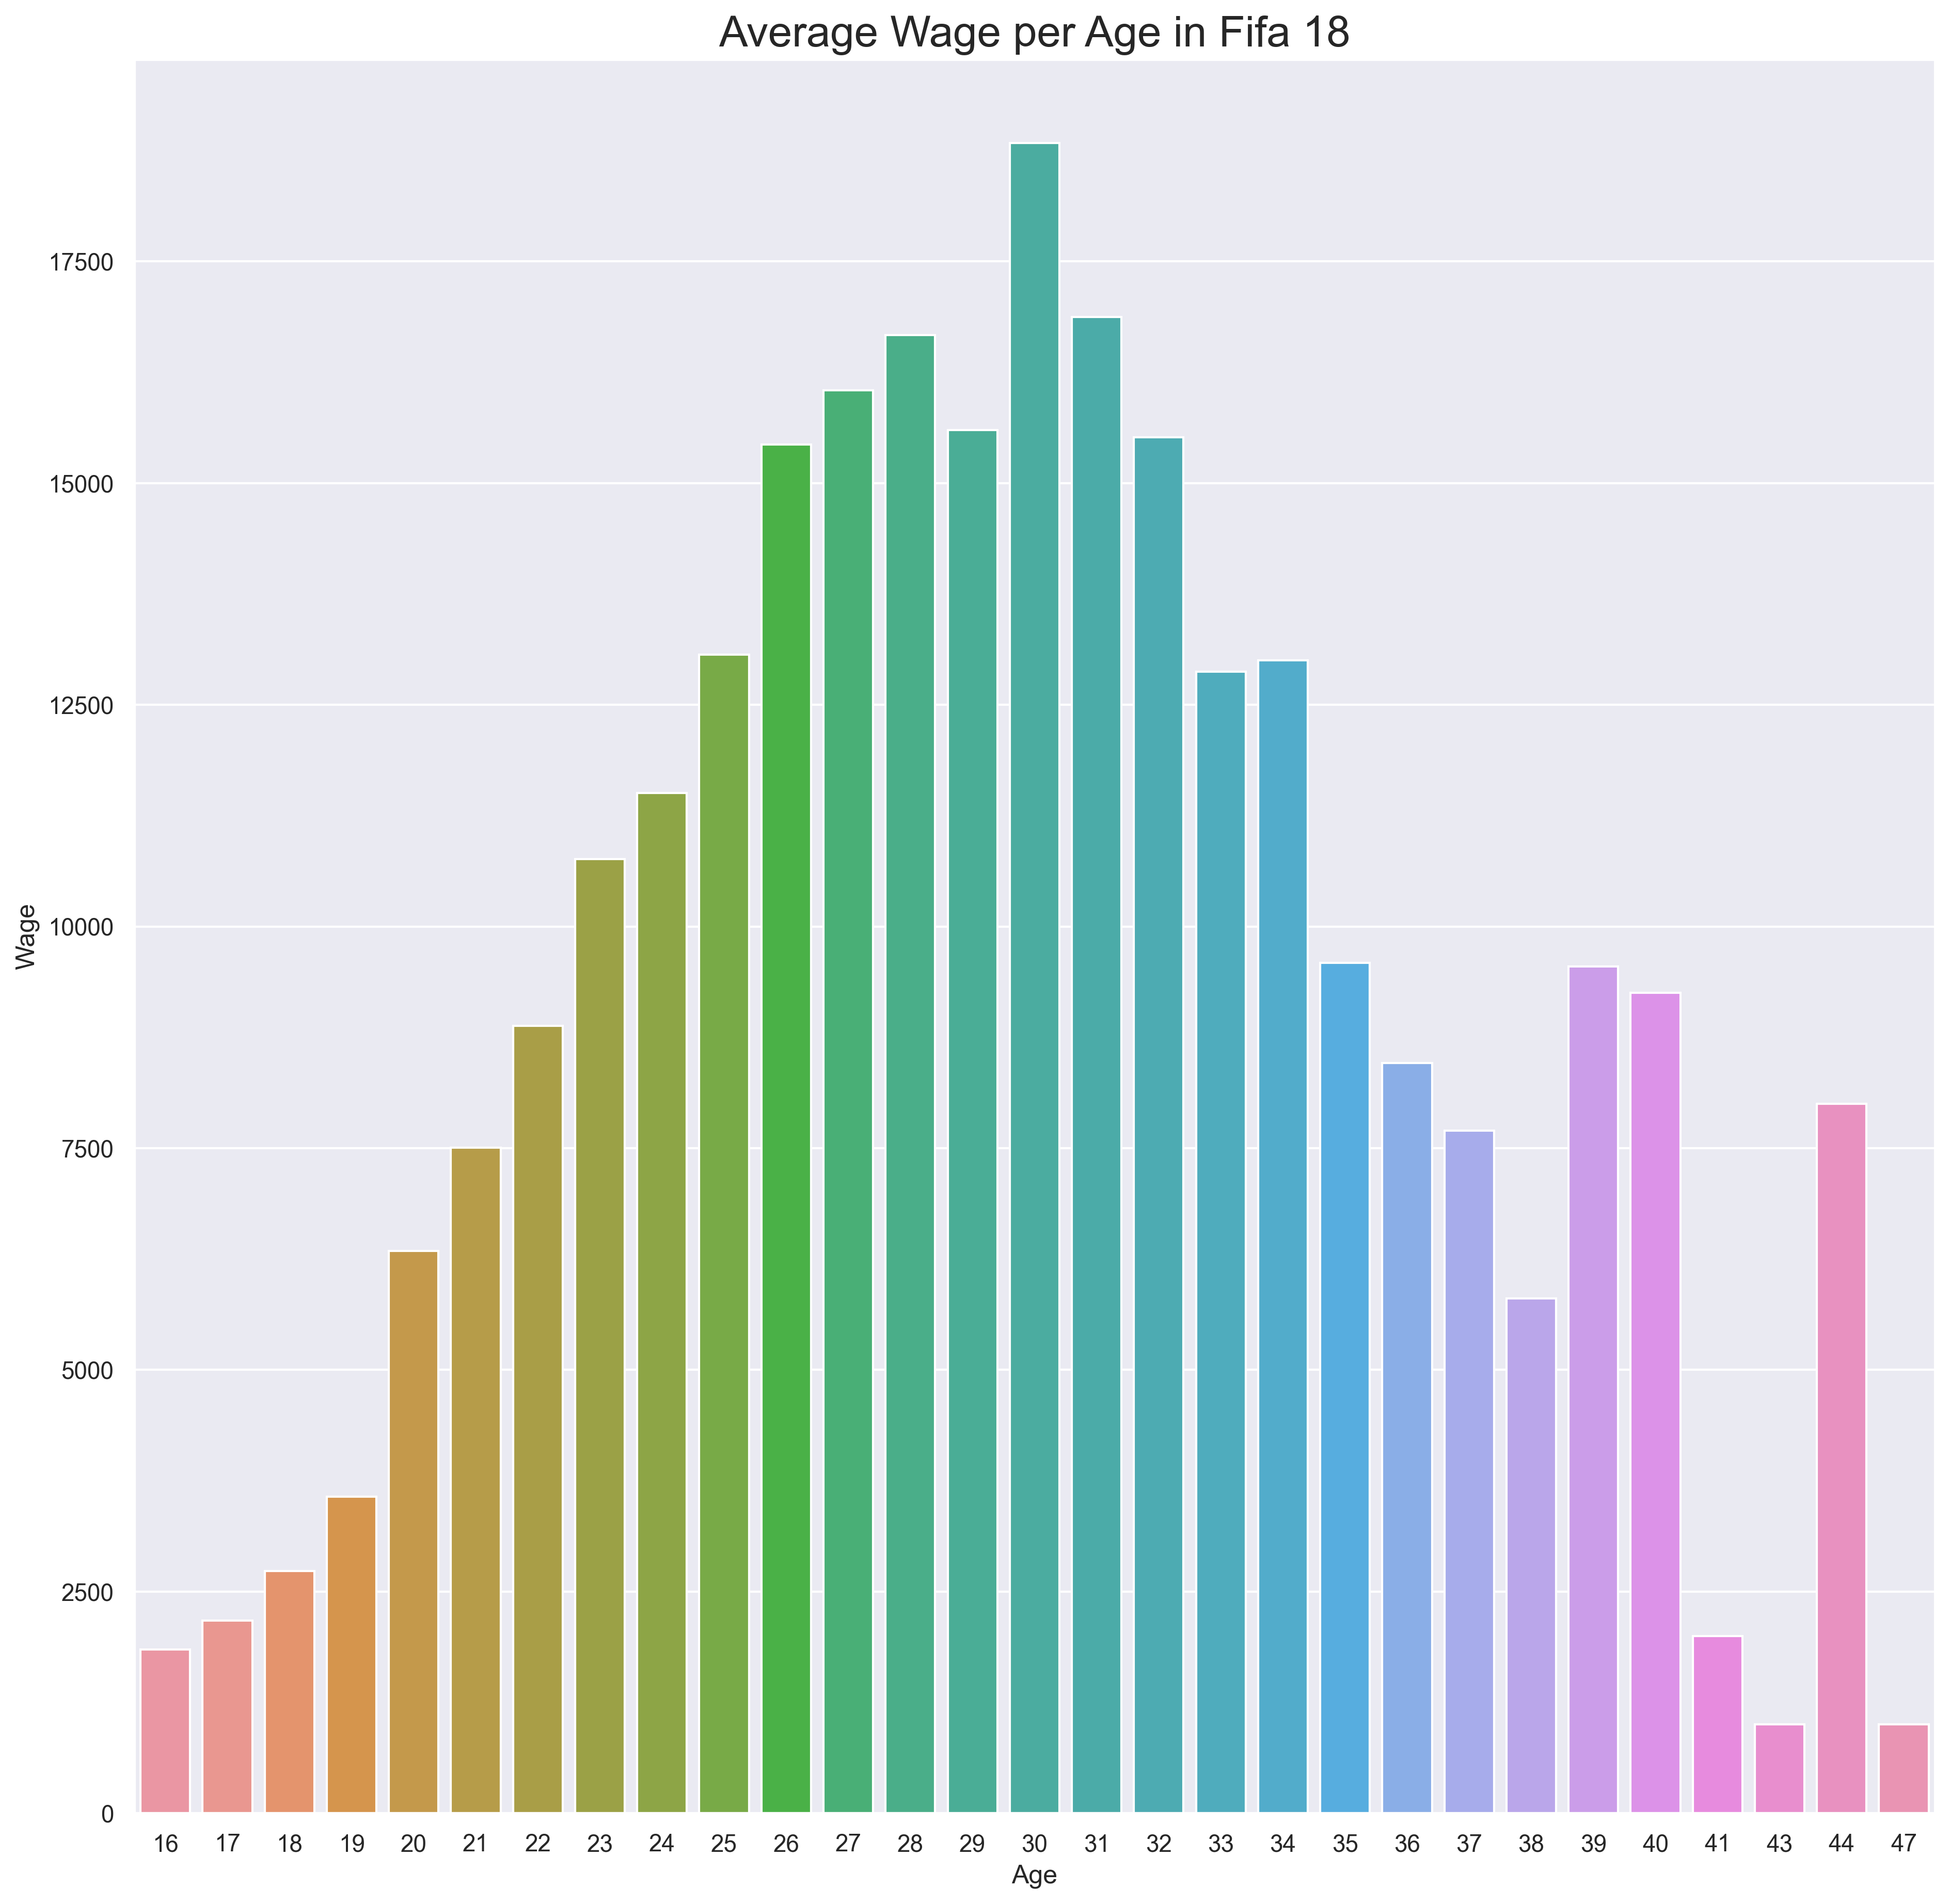

In [65]:
%matplotlib inline

plt.figure(figsize=(15, 15), dpi = 300) 
sns.barplot(age_wage.index, age_wage)
plt.title("Average Wage per Age in Fifa 18", size = 20);
destination = input("Please provide destination path: ")
plt.savefig(destination+"Average_Age_vs_Wage_Bar", dpi = 300, format = 'jpeg')